In [1]:
import pandas as pd
import numpy as np


In [2]:
df = pd.read_csv('Ethereum Historical Data.csv') # Daily historical data from 2016 - 2023
df.head(10)

,Date,Price,Open,High,Low,Vol,Change %
0,"May 06, 2023","1,969.82","1,993.33","2,013.10","1,964.43",641.57K,-1.18%
1,"May 05, 2023","1,993.33","1,877.06","1,996.64","1,875.66",589.05K,6.19%
2,"May 04, 2023","1,877.06","1,904.76","1,915.15","1,868.18",372.69K,-1.45%
3,"May 03, 2023","1,904.74","1,869.74","1,915.00","1,844.72",489.66K,1.87%
4,"May 02, 2023","1,869.74","1,830.75","1,878.70","1,823.25",391.27K,2.13%
5,"May 01, 2023","1,830.75","1,869.05","1,885.70","1,807.30",475.92K,-2.04%
6,"Apr 30, 2023","1,868.88","1,907.80","1,937.86","1,868.88",377.71K,-2.04%
7,"Apr 29, 2023","1,907.80","1,890.93","1,915.90","1,886.27",193.47K,0.88%
8,"Apr 28, 2023","1,891.14","1,908.79","1,922.85","1,875.03",408.45K,-0.93%
9,"Apr 27, 2023","1,908.81","1,866.05","1,937.55","1,862.37",771.48K,2.29%


In [4]:
df["Date"] # It has been transformed into a Pandas datetime object.

0      2023-05-06
1      2023-05-05
2      2023-05-04
3      2023-05-03
4      2023-05-02
          ...    
2609   2016-03-14
2610   2016-03-13
2611   2016-03-12
2612   2016-03-11
2613   2016-03-10
Name: Date, Length: 2614, dtype: datetime64[ns]

In [5]:
# Let's check the day and date of the first row. Remember df.loc[row_index, column_name]
df.loc[0, "Date"].day

6

In [11]:
# Let's get the name of the day of the week using the Series.dt.day_name method
df["Date"].dt.day_name()

0        Saturday
1          Friday
2        Thursday
3       Wednesday
4         Tuesday
          ...    
2609       Monday
2610       Sunday
2611     Saturday
2612       Friday
2613     Thursday
Name: Date, Length: 2614, dtype: object

In [12]:
# Let's create a column to hold these values
df["DaysOfWeek"] = df["Date"].dt.day_name()
df

,Date,Price,Open,High,Low,Vol,Change %,DaysOfWeek
0,2023-05-06,"1,969.82","1,993.33","2,013.10","1,964.43",641.57K,-1.18%,Saturday
1,2023-05-05,"1,993.33","1,877.06","1,996.64","1,875.66",589.05K,6.19%,Friday
2,2023-05-04,"1,877.06","1,904.76","1,915.15","1,868.18",372.69K,-1.45%,Thursday
3,2023-05-03,"1,904.74","1,869.74","1,915.00","1,844.72",489.66K,1.87%,Wednesday
4,2023-05-02,"1,869.74","1,830.75","1,878.70","1,823.25",391.27K,2.13%,Tuesday
...,...,...,...,...,...,...,...,...
2609,2016-03-14,12.5,15.07,15.07,11.4,92.18K,-17.05%,Monday
2610,2016-03-13,15.07,12.92,15.07,12.92,1.30K,16.64%,Sunday
2611,2016-03-12,12.92,11.95,13.45,11.95,0.83K,8.12%,Saturday
2612,2016-03-11,11.95,11.75,11.95,11.75,0.18K,1.70%,Friday


In [13]:
# Let's get data in 2023
filt = (df["Date"] >= pd.to_datetime("2023-01-01"))
df.loc[filt]

,Date,Price,Open,High,Low,Vol,Change %,DaysOfWeek
0,2023-05-06,"1,969.82","1,993.33","2,013.10","1,964.43",641.57K,-1.18%,Saturday
1,2023-05-05,"1,993.33","1,877.06","1,996.64","1,875.66",589.05K,6.19%,Friday
2,2023-05-04,"1,877.06","1,904.76","1,915.15","1,868.18",372.69K,-1.45%,Thursday
3,2023-05-03,"1,904.74","1,869.74","1,915.00","1,844.72",489.66K,1.87%,Wednesday
4,2023-05-02,"1,869.74","1,830.75","1,878.70","1,823.25",391.27K,2.13%,Tuesday
...,...,...,...,...,...,...,...,...
121,2023-01-05,"1,250.95","1,256.92","1,259.08","1,242.93",289.49K,-0.47%,Thursday
122,2023-01-04,"1,256.92","1,214.57","1,266.97","1,212.91",504.28K,3.49%,Wednesday
123,2023-01-03,"1,214.57","1,213.93","1,219.75","1,206.83",219.98K,0.05%,Tuesday
124,2023-01-02,"1,213.93","1,200.52","1,220.76","1,193.77",270.72K,1.12%,Monday


In [16]:
# Let's get data in 2022
filt2 = (df["Date"] >= pd.to_datetime("2022-01-01")) & (df["Date"] < pd.to_datetime("2023-01-01"))
df.loc[filt2]

,Date,Price,Open,High,Low,Vol,Change %,DaysOfWeek
126,2022-12-31,"1,195.67","1,200.00","1,207.71","1,193.16",150.20K,-0.34%,Saturday
127,2022-12-30,"1,199.80","1,200.84","1,202.13","1,186.10",285.77K,-0.09%,Friday
128,2022-12-29,"1,200.84","1,189.99","1,205.34","1,187.19",272.59K,0.91%,Thursday
129,2022-12-28,"1,189.98","1,211.60","1,214.32","1,184.22",407.45K,-1.78%,Wednesday
130,2022-12-27,"1,211.60","1,228.22","1,233.15","1,202.02",290.02K,-1.31%,Tuesday
...,...,...,...,...,...,...,...,...
486,2022-01-05,"3,535.86","3,784.47","3,846.44","3,418.46",582.71K,-6.69%,Wednesday
487,2022-01-04,"3,789.52","3,764.62","3,889.07","3,715.24",415.81K,0.67%,Tuesday
488,2022-01-03,"3,764.24","3,830.70","3,849.50","3,682.48",338.51K,-1.73%,Monday
489,2022-01-02,"3,830.67","3,765.67","3,851.16","3,718.33",242.55K,1.73%,Sunday


In [19]:
# Since these dates are unique, we can set the dates as the indexes for easier references
df.set_index("Date", inplace=True)
df

,Price,Open,High,Low,Vol,Change %,DaysOfWeek
Date,,,,,,,
2023-05-06,"1,969.82","1,993.33","2,013.10","1,964.43",641.57K,-1.18%,Saturday
2023-05-05,"1,993.33","1,877.06","1,996.64","1,875.66",589.05K,6.19%,Friday
2023-05-04,"1,877.06","1,904.76","1,915.15","1,868.18",372.69K,-1.45%,Thursday
2023-05-03,"1,904.74","1,869.74","1,915.00","1,844.72",489.66K,1.87%,Wednesday
2023-05-02,"1,869.74","1,830.75","1,878.70","1,823.25",391.27K,2.13%,Tuesday
...,...,...,...,...,...,...,...
2016-03-14,12.5,15.07,15.07,11.4,92.18K,-17.05%,Monday
2016-03-13,15.07,12.92,15.07,12.92,1.30K,16.64%,Sunday
2016-03-12,12.92,11.95,13.45,11.95,0.83K,8.12%,Saturday


In [29]:
# It's easier to locate dates now. Let's get data from Jan 2022 to Apr 2022
# NOTE: Using df.loc["2022-01":"2022-04"] will raise an error:
# KeyError: 'Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is not allowed.'
# Use df.sort_index().loc[] instead while slicing through datetime objects

df.sort_index().loc["2022-01":"2022-04"]

,Price,Open,High,Low,Vol,Change %,DaysOfWeek
Date,,,,,,,
2022-01-01,"3,765.67","3,677.69","3,775.20","3,675.75",239.54K,2.39%,Saturday
2022-01-02,"3,830.67","3,765.67","3,851.16","3,718.33",242.55K,1.73%,Sunday
2022-01-03,"3,764.24","3,830.70","3,849.50","3,682.48",338.51K,-1.73%,Monday
2022-01-04,"3,789.52","3,764.62","3,889.07","3,715.24",415.81K,0.67%,Tuesday
2022-01-05,"3,535.86","3,784.47","3,846.44","3,418.46",582.71K,-6.69%,Wednesday
...,...,...,...,...,...,...,...
2022-04-26,"2,810.42","3,006.04","3,032.70","2,768.38",694.46K,-6.51%,Tuesday
2022-04-27,"2,888.99","2,810.42","2,916.39","2,795.58",602.24K,2.80%,Wednesday
2022-04-28,"2,937.01","2,889.01","2,977.78","2,856.42",726.03K,1.66%,Thursday


In [39]:
# Let's get the avg opening price for Ethereum in 2023
# Let's convert this column into a float and replace the commas 
# Ignore this error, the values have already been converted
df["Open"] = df["Open"].str.replace(",", "").astype(float)

AttributeError: Can only use .str accessor with string values!

In [40]:
df["Open"]

Date
2023-05-06    1993.33
2023-05-05    1877.06
2023-05-04    1904.76
2023-05-03    1869.74
2023-05-02    1830.75
               ...   
2016-03-14      15.07
2016-03-13      12.92
2016-03-12      11.95
2016-03-11      11.75
2016-03-10      11.20
Name: Open, Length: 2614, dtype: float64

In [41]:
# Let's get the avg values now
df.loc["2023", "Open"].mean()

1674.1480952380953

In [42]:
# Let's get the median values
df.loc["2023", "Open"].median()

1659.685

In [44]:
# Let's get the median values for 2022 and compare
df.loc["2022", "Open"].median()
# The opening price for 2022 was higher than that of 2023.

1690.29

In [46]:
# Let's get the Highs of the months of 2022
df.loc["2022", "High"]

Date
2022-12-31    1,207.71
2022-12-30    1,202.13
2022-12-29    1,205.34
2022-12-28    1,214.32
2022-12-27    1,233.15
                ...   
2022-01-05    3,846.44
2022-01-04    3,889.07
2022-01-03    3,849.50
2022-01-02    3,851.16
2022-01-01    3,775.20
Name: High, Length: 365, dtype: object

In [63]:
# The high column has been converted into a float, I deleted the cell by mistake

highs2 = df.loc["2021", "High"].resample("M", convention='start').max()

In [62]:
highs2

Date
2021-01-31    1474.68
2021-02-28    2040.79
2021-03-31    1945.40
2021-04-30    2797.61
2021-05-31    4366.10
2021-06-30    2889.19
2021-07-31    2551.68
2021-08-31    3467.42
2021-09-30    4024.89
2021-10-31    4458.30
2021-11-30    4864.06
2021-12-31    4778.14
Freq: M, Name: High, dtype: float64

In [68]:
# Let's plot these values
%matplotlib inline
import matplotlib

Text(0.5, 1.0, 'Highest prices of Ethereum each start of the month in 2021')

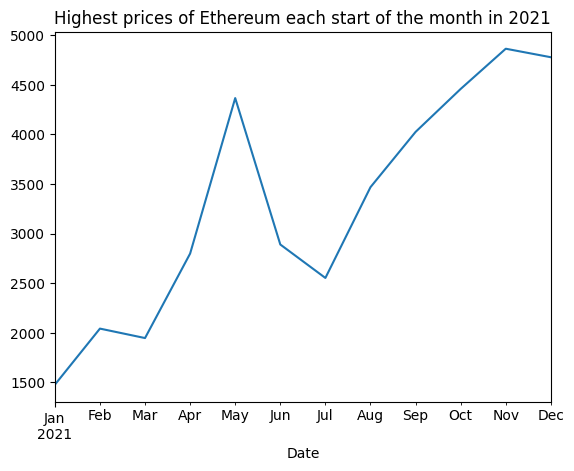

In [71]:
highs2.plot()
matplotlib.pyplot.title("Highest prices of Ethereum each start of the month in 2021")

# We can see the prices on the High column keep on increasing every start of month.

In [74]:
# Let's resample this data and get the max value for the High, min value for the Low and mean value for the Open.
# Let's check the dtypes of each column again to avoid errors
df.dtypes

Price          object
Open          float64
High          float64
Low           float64
Vol            object
Change %       object
DaysOfWeek     object
dtype: object

In [73]:
# Let's convert the Low column into a float
df["Low"] = df["Low"].str.replace(",", "").astype(float)

In [79]:
# Let's resample all this data using the agg() function. For this, we need to resample our whole df
totals = df.resample("M", convention='start').agg({"Open":"mean", "High":"max", "Low":"min"})
totals.loc["2022"]

,Open,High,Low
Date,,,
2022-01-31,3084.661613,3889.07,2161.55
2022-02-28,2858.382857,3277.36,2303.07
2022-03-31,2863.822258,3481.23,2447.74
2022-04-30,3113.738000,3579.82,2716.31
2022-05-31,2212.804839,2963.54,1708.62
2022-06-30,1411.417667,1971.22,883.35
2022-07-31,1339.405161,1781.39,1012.29
2022-08-31,1702.951935,2028.40,1424.33
2022-09-30,1491.399333,1788.10,1222.29


<Axes: xlabel='Date'>

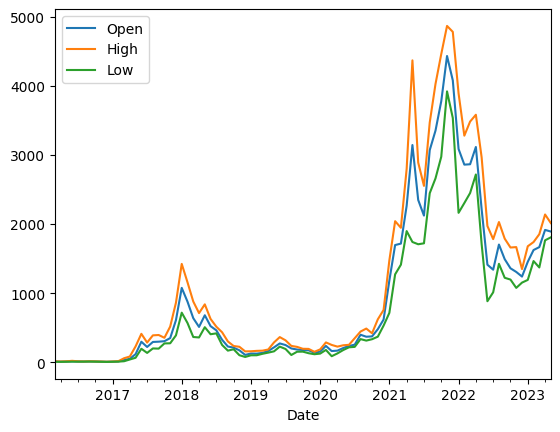

In [77]:
totals.plot()